In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
winning_model_df = pd.read_pickle('../code/app/subcortex-app/data/winning_models/qmri_age_models.pkl')

In [3]:
winning_model_df.head()

,ROI,qMRI,Statistic,ivs,model,result,BIC,rsquared,is_winner_BIC,ivs_2,new_winning_model_3
9,3V,iron,median,Age2 + sex,<statsmodels.regression.linear_model.OLS objec...,<statsmodels.regression.linear_model.Regressio...,323.605685,2.049183e-01,True,Age2 + sex,False
30,3V,iron,iqr,Age2,<statsmodels.regression.linear_model.OLS objec...,<statsmodels.regression.linear_model.Regressio...,522.990511,2.993918e-01,True,Age2,False
48,3V,myelin,median,1,<statsmodels.regression.linear_model.OLS objec...,<statsmodels.regression.linear_model.Regressio...,330.545791,2.220446e-16,True,1,False
80,3V,myelin,iqr,Age2 + Age:sex,<statsmodels.regression.linear_model.OLS objec...,<statsmodels.regression.linear_model.Regressio...,194.409033,1.389058e-01,True,Age2 + Age:sex,False
96,3V,r1hz,median,1,<statsmodels.regression.linear_model.OLS objec...,<statsmodels.regression.linear_model.Regressio...,-346.215862,-2.220446e-16,True,1,False


In [4]:
age_range = np.arange(19, 76)
predict_df_0 = pd.DataFrame({'Age': age_range, 'Age2': age_range**2, 'sex': 0})

Intercept    15.811110
Age           0.055264
Age2         -0.000800
dtype: float64
Intercept    1.557304
Age          0.020952
dtype: float64


/home/stevenm/.conda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


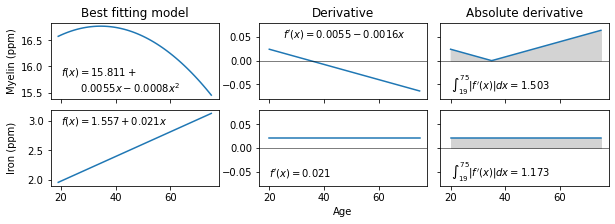

In [10]:
f, ax = plt.subplots(2,4, figsize=(10,3), sharex=True, gridspec_kw={'hspace':.15, 'wspace':.1, 'width_ratios':[.3,.025,.3,.3]})

aucs = []
for i in range(2):
    if i == 0:
        roi = 'ic'
        statistic = 'median'
        measure = 'myelin'
    elif i == 1:
        roi = 'AMG'
        statistic = 'median'
        measure = 'iron'
    
    result = winning_model_df.loc[(winning_model_df.ROI==roi) & (winning_model_df.qMRI==measure) & (winning_model_df.Statistic==statistic), 'result'].values[0]
    params = result.params
    print(params)
    y = result.predict(exog=predict_df_0)

    ax[i,0].plot(age_range,y)
    ax[i,2].plot(age_range[1:], np.diff(y))
    ax[i,2].axhline(color='k', linewidth=.5)
    ax[i,2].set_ylim(-0.08, 0.08)

    ax[i,3].plot(age_range[1:], np.abs(np.diff(y)))
    ax[i,3].axhline(color='k', linewidth=.5)
    ax[i,3].set_ylim(ax[i,2].get_ylim())
    ax[i,3].set_yticklabels([])
    
    ax[i,3].fill_between(age_range[1:], np.abs(np.diff(y)), color='lightgrey')
    aucs.append(np.sum(np.abs(np.diff(y))))

ax[0,0].text(20, 15.5, s='$f(x) = 15.811+$\n      $0.0055x-0.0008x^2$')
ax[0,2].text(25, 0.05, s='$f\'(x) = 0.0055-0.0016x$')
ax[0,3].text(20, -0.06, s='$\int_{{19}}^{{75}} |f\'(x)|dx = {:.3f}$'.format(aucs[0]))
ax[0,0].set_ylabel('Myelin (ppm)')

ax[1,0].text(20, 2.95, s='$f(x) = 1.557+0.021x$')
ax[1,2].text(20, -0.06, s='$f\'(x) = 0.021$')
ax[1,3].text(20, -0.06, s='$\int_{{19}}^{{75}} |f\'(x)|dx = {:.3f}$'.format(aucs[1]))
ax[1,0].set_ylabel('Iron (ppm)')


ax[0,0].set_title('Best fitting model')
ax[0,2].set_title('Derivative')
ax[0,3].set_title('Absolute derivative')

ax[0,1].axis('off')
ax[1,1].axis('off')

ax[1,2].set_xlabel('Age')

np.sum(np.abs(np.diff(y)))

f.tight_layout()
f.align_ylabels(ax[:, 0])
f.savefig('./derivative_illustration.pdf', bbox_inches='tight')


Procedure of estimating total amount of change across the adult lifespan. The left column shows two example models: One inverted U-shape (median myelin change in the internal capsule), and one linear increase (median iron change in the amygdala). Formally, change across ages is given by the first derivative (middle column). To collapse over the direction of change (increase or decrease), we took the absolute of the derivative (right column). The sum of this absolute derivative (illustrated by the gray area under the curve) represents the total amount of change in a region. As a final step (not illustrated), the sum of the absolute derivative is divided by the model prediction at 19 years old, which represents the total amount of change relative to the baseline value.